In [1]:
!pip install huggingface_hub
!pip install transformers
!pip install datasets


In [2]:
!pip install torch

In [3]:
pip install torch torchvision torchaudio


Iam Using a data set named glue -mrpc from hugging face

This set is a basic sample dataset which has columns sentence1,sentence2,label and idx

In [4]:
from datasets import load_dataset


sample = load_dataset("glue","mrpc")
sample

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

In [5]:
print(sample['train']['sentence1'][3])
print(sample['train']['label'][3])

Around 0335 GMT , Tab shares were up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 .
0


In [6]:
sample.set_format(type='pandas')
df = sample['train'][:]
df.head()

,sentence1,sentence2,label,idx
0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...",1,0
1,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...,0,1
2,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",1,2
3,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",0,3
4,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,1,4


<Axes: ylabel='label'>

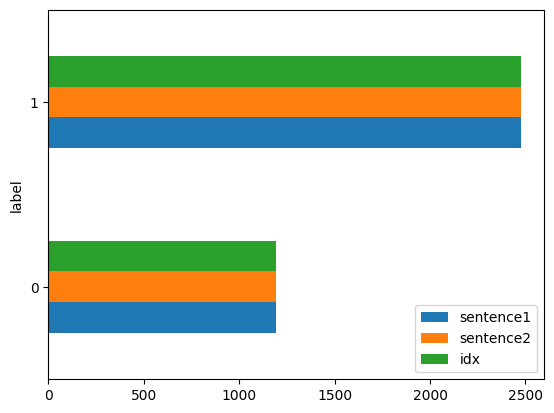

In [7]:
df.groupby('label').count().plot.barh()

In [8]:
pip install transformers

In [9]:
import transformers

In [10]:
from transformers import AutoTokenizer

In [11]:
# Tokenization
model_pkg = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_pkg)

In [12]:
def tokenize(example):
    return tokenizer(example['sentence1'], padding=True, truncation=True)
sample.set_format(type=None)
print(tokenize(sample['train'][:2]))
print(sample['train'][:2])

{'input_ids': [[101, 7277, 2180, 5303, 4806, 1117, 1711, 117, 2292, 1119, 1270, 107, 1103, 7737, 107, 117, 1104, 9938, 4267, 12223, 21811, 1117, 2554, 119, 102, 0, 0], [101, 10684, 2599, 9717, 1161, 2205, 11288, 1377, 112, 188, 1196, 4147, 1103, 4129, 1106, 19770, 2787, 1107, 1772, 1111, 109, 123, 119, 126, 3775, 119, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}
{'sentence1': ['Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .', "Yucaipa owned Dominick 's before selling the chain to Safeway in 1998 for $ 2.5 billion ."], 'sentence2': ['Referring to him as only " the witness " , Amrozi accused his brother 

In [13]:
encoded_sample = sample.map(tokenize, batched=True)

In [14]:
# using a pretrained model
# If you have a gpu use it!
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = transformers.AutoModel.from_pretrained(model_pkg).to(device)

In [15]:
text = 'this is a test'
inputs = tokenizer(text, return_tensors='pt')
inputs

{'input_ids': tensor([[ 101, 1142, 1110,  170, 2774,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

In [16]:
with torch.no_grad():
    outputs = model(**inputs)
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.3690,  0.0089,  0.1747,  ...,  0.0280,  0.2350,  0.2174],
         [ 0.3392, -0.3467,  0.6648,  ..., -0.0488,  0.0831,  0.2385],
         [ 0.3706,  0.0915,  0.6187,  ...,  0.4607, -0.1707,  0.4088],
         [ 0.4245,  0.0082, -0.0337,  ...,  0.5025,  0.4027,  0.2366],
         [ 0.2297, -0.0083,  0.2656,  ...,  0.5958, -0.1221,  0.4063],
         [ 0.8738,  0.4056, -0.2475,  ...,  0.2062,  1.3745,  0.0645]]]), pooler_output=tensor([[-0.6599,  0.4466,  0.9999, -0.9919,  0.9577,  0.8817,  0.9772, -0.9916,
         -0.9606, -0.6771,  0.9724,  0.9980, -0.9980, -0.9998,  0.7650, -0.9651,
          0.9899, -0.5775, -0.9999, -0.7606, -0.6239, -0.9998,  0.2023,  0.9659,
          0.9749,  0.0012,  0.9826,  0.9999,  0.8755, -0.5090,  0.2935, -0.9893,
          0.8147, -0.9986,  0.1218,  0.1969,  0.6634, -0.2502,  0.8912, -0.9515,
         -0.7623, -0.6290,  0.6745, -0.5636,  0.8588,  0.1017,  0.0162, -0.1342,
        

In [17]:
def hidden_states(x):
    inputs = {k:v.to(device) for k,v in x.items()
              if k in tokenizer.model_input_names}
    with torch.no_grad():
        hidden_state = model(**inputs).last_hidden_state
    return {'hidden_state': hidden_state[:,0].cpu().numpy()}


In [18]:
encoded_sample

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

In [19]:
encoded_sample.set_format('torch', columns=[ 'attention_mask', 'label','input_ids'])
hidden_sample = encoded_sample.map(hidden_states, batched=True)

In [20]:
hidden_sample['train']['hidden_state']

tensor([[ 0.3533,  0.1151, -0.1833,  ..., -0.0285,  0.1310, -0.2640],
        [ 0.4525, -0.1728, -0.4675,  ...,  0.0647,  0.0246,  0.0566],
        [ 0.3400,  0.0083, -0.1438,  ..., -0.3880, -0.0186,  0.0234],
        ...,
        [ 0.1102, -0.0409, -0.0521,  ..., -0.2293, -0.1145, -0.2832],
        [ 0.0338, -0.1257,  0.0872,  ..., -0.1594,  0.1676,  0.0070],
        [ 0.0206, -0.1191, -0.1882,  ..., -0.0467, -0.0569,  0.0684]])

In [21]:
X_train = hidden_sample['train']['hidden_state'].numpy()
y_train = hidden_sample['train']['label'].numpy()
X_validation = hidden_sample['validation']['hidden_state'].numpy()
y_validation = hidden_sample['validation']['label'].numpy()

In [22]:
pip install umap-learn


In [23]:
import umap

In [24]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
umapper = umap.UMAP(n_components=2)
tsne = TSNE(n_components=2)
X_scaled = MinMaxScaler().fit_transform(X_train)
X_tsne = tsne.fit_transform(X_scaled)
X_umap = umapper.fit_transform(X_scaled)
df = pd.DataFrame()
df['x']=X_tsne[:,0]
df['y']=X_tsne[:,1]
df['label']=y_train

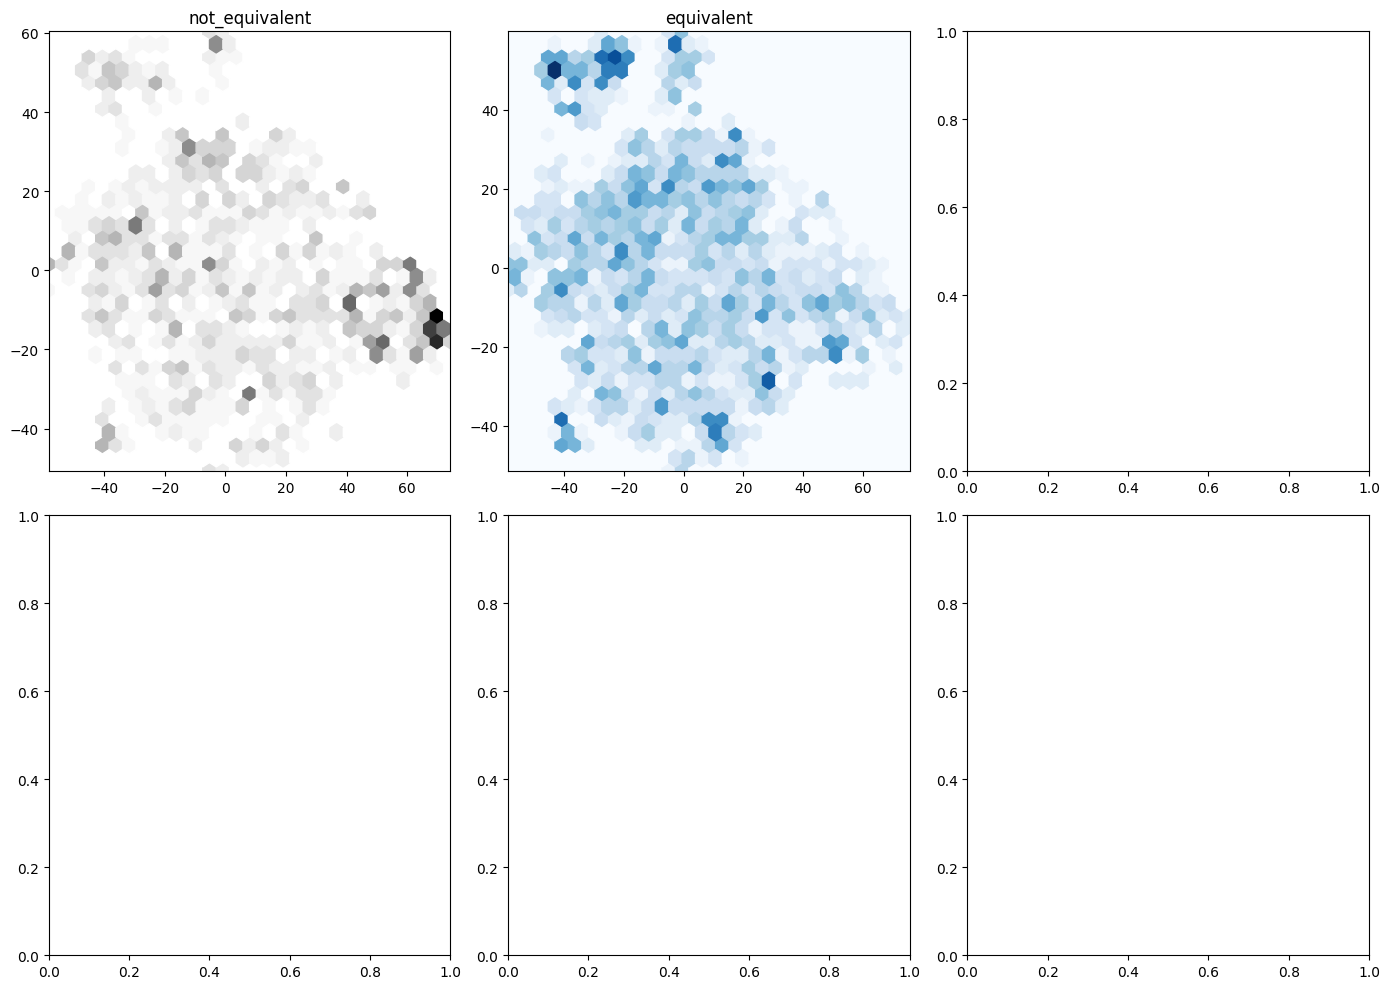

In [38]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Greens']
labels = sample['train'].features['label'].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    # Filter the data corresponding to the current label
    df_sub = df[df['label'] == labels.index(label)]

    # Check if the data subset is not empty
    if not df_sub.empty:
        # Plot hexbin for the current label
        axes[i].hexbin(df_sub['x'], df_sub['y'], gridsize=30, cmap=cmap)
        axes[i].set_title(label)

        # Set appropriate x and y limits
        axes[i].set_xlim((df_sub['x'].min(), df_sub['x'].max()))
        axes[i].set_ylim((df_sub['y'].min(), df_sub['y'].max()))

plt.tight_layout()
plt.show()



In [26]:
# Note we can just use the distilbert features with Logistic Regression!
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
lr = LogisticRegression(max_iter=500,)
lr.fit(X_scaled, y_train)
X_validation_scaled = MinMaxScaler().fit_transform(X_validation)
accuracy_score(lr.predict(X_validation_scaled), y_validation)

0.6985294117647058

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()

rf.fit(X_scaled,y_train)
X_validation_scaled = MinMaxScaler().fit_transform(X_validation)
predictions = rf.predictions(X_validation_scaled)
accuracy = accuracy_score(y_validation,predications)
print("Accuracy:",accuracy)

Accuracy : 0.6274509803921569

In [27]:
# helper function for metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1}

In [28]:
from transformers import AutoModelForSequenceClassification
model = (AutoModelForSequenceClassification
         .from_pretrained(model_pkg, num_labels=6)
         .to(device))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [29]:
pip install accelerate -U

In [30]:
# Upgrade accelerate library
!pip install accelerate>=0.21.0

# OR Install transformers library with torch extra dependencies
!pip install transformers[torch]


In [31]:

# Assuming you've already imported the required libraries
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Set the model package name
model_pkg = 'distilbert-base-uncased'

# Define the number of labels and batch size
num_labels = 6
batch_size = 64

# Calculate logging steps (assuming encoded_sample['train'] is available)
logging_steps = len(encoded_sample['train']) // batch_size

# Construct the fine-tuned model name
model_name = f'{model_pkg}-fine-tuned'

# Load the pre-trained model
model = AutoModelForSequenceClassification.from_pretrained(model_pkg, num_labels=num_labels)

from transformers import DataCollatorWithPadding

# Define a data collator with padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
training_args = transformers.TrainingArguments(output_dir = model_name,
                                               num_train_epochs=2,
                                               learning_rate=.00002,
                                               per_device_train_batch_size=64,
                                               per_device_eval_batch_size=64,
                                               weight_decay=.01,
                                               logging_steps=logging_steps,
                                               evaluation_strategy='epoch',
                                               log_level='error',
                                               #push_to_hub=True
                                               )
# Instantiate the Trainer class with the data collator
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,  # Use the data collator for padding
    train_dataset=encoded_sample['train'],
    eval_dataset=encoded_sample['validation'],
)

# Train the model
trainer.train()



Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.931800,0.673821
2,0.667800,0.647642


TrainOutput(global_step=116, training_loss=0.7976123443965254, metrics={'train_runtime': 2173.3336, 'train_samples_per_second': 3.375, 'train_steps_per_second': 0.053, 'total_flos': 106296111016704.0, 'train_loss': 0.7976123443965254, 'epoch': 2.0})

In [33]:
preds = trainer.predict(encoded_sample['test'])
preds.metrics

{'test_loss': 0.6541959047317505,
 'test_runtime': 203.0008,
 'test_samples_per_second': 8.498,
 'test_steps_per_second': 0.133}

In [34]:
preds.predictions.argmax(-1)

array([1, 1, 1, ..., 1, 1, 1])

Performance evalution:


1) Logistic regression  gave an accuracy score of 0.6985

2) Random Forest also gave a similar accuracy score of 0.67

3) While using fine-tuning  gave a loss of 0.6738 and the training loss is around 0.931800, more epochs might be needed for fine-tuning,for the so-considered data set. Comparing the three in this case logistic regression performed well,


4)Validation loss of 0.673 is not considered as best model, hence my answer is logistic regression did well